# Mcpy
## MolSSI Summer School -- Domain Specific Project
### -- Van Nguyen, Brian Nguyen, Joel Ricci, Sabiha Rustam, and Brandon Butler

### 2019-07-31

### Import necessary modules

In [1]:
import numpy as np
import mcpy.particles
import mcpy.box
import mcpy.pairwise
import mcpy.integrator
import mcpy.mcsimulation
from timeit import default_timer as timer

### Set up simulation parameters

In [3]:
reduced_temperature = 0.9
reduced_density = 0.9
num_part = 500

## Initialize objects

* Box -- holds the box dimensions and can manipulate periodic
  points
* Particles -- holds the particle's coordinates and number
  with the potential to later aggregate other quantities
* LJ -- computes the pairwise potential of a series of
  points
* Integrator -- Class that actually performs the displacement
  trial move
* MCSimulation -- Interfaces all the classes correctly together.

In [6]:
box_dims = np.full(3, np.cbrt(num_part / reduced_density))
box = mcpy.box.Box(box_dims=box_dims)
part = mcpy.particles.Particles.from_random(num_particles=num_part,
                                            box_dims=box.box_dims)
lj = mcpy.pairwise.LJ(cutoff=3.)
intg = mcpy.integrator.Integrator(1/reduced_temperature)
mc = mcpy.mcsimulation.MCSimulation()

### Add objects to MCSimulation object

In [7]:
mc.add_integrator(intg)
mc.add_box(box)
mc.add_particles(part)
mc.add_potential(lj)

### Runs Simulation for 1 Million Steps

In [8]:
t1 = timer()
mc.run(1000000)
t2 = timer()

Step 10000, Energy 13.327134710585188, Acceptance Rates [0.4052]
Step 20000, Energy -2.821599098803799, Acceptance Rates [0.3646]
Step 30000, Energy -4.752318487498101, Acceptance Rates [0.36486667]
Step 40000, Energy -5.123084134430791, Acceptance Rates [0.380025]
Step 50000, Energy -5.302107967180104, Acceptance Rates [0.39252]
Step 60000, Energy -5.439962901864734, Acceptance Rates [0.40168333]
Step 70000, Energy -5.561079841019232, Acceptance Rates [0.41025714]
Step 80000, Energy -5.603006542748481, Acceptance Rates [0.4172875]
Step 90000, Energy -5.686591664738901, Acceptance Rates [0.42275556]
Step 100000, Energy -5.680470500688512, Acceptance Rates [0.42385]
Step 110000, Energy -5.680204995645535, Acceptance Rates [0.42175455]
Step 120000, Energy -5.6769187055540655, Acceptance Rates [0.41649167]
Step 130000, Energy -5.695318838077272, Acceptance Rates [0.41206923]
Step 140000, Energy -5.707074877632085, Acceptance Rates [0.40812143]
Step 150000, Energy -5.761956976159708, Accep

In [10]:
print("1 million steps in {:4d} sec".format(int(t2 - t1)))
print("{:5d} steps per second.".format(int(1e6/(t2 - t1))))

1 million steps in  179 sec
 5559 steps per second.


## Original Script

In [11]:
t1 = timer()
%run day_1.py
t2 = timer()

10000 31.229914164001794
20000 -2.4177548352379254
30000 -4.475914814727645
40000 -5.000929933948568
50000 -5.312395085433374
60000 -5.462793671413833
70000 -5.579268185874112
80000 -5.623278528788432
90000 -5.661478811045674
100000 -5.768227346447591


In [13]:
print("One hundred thousand steps in {:4d} sec".format(int(t2 - t1)))
print("{:5d} steps per second.".format(int(1e5/(t2 - t1))))

One hundred thousand steps in  770 sec
  129 steps per second.


## Numpy Speedup

In [9]:
print("Numpy code is {:6.2f} times faster.".format(5559/129))

Numpy code is  43.09 times faster.


## Using C++ LJ Class

In [14]:
## Need to reset kernel
!git checkout -f lj_cpp_class

Already on 'lj_cpp_class'
Your branch is up to date with 'origin/lj_cpp_class'.


In [1]:
import numpy as np
import mcpy.box
import mcpy.particles
import mcpy.integrator
import mcpy.mcsimulation
from mccpp.pairwise import LJ
from timeit import default_timer as timer

In [2]:
reduced_temperature = 0.9
reduced_density = 0.9
num_part = 500

In [3]:
box_dims = np.full(3, np.cbrt(num_part / reduced_density))
box = mcpy.box.Box(box_dims=box_dims)
part = mcpy.particles.Particles.from_random(num_particles=num_part,
                                            box_dims=box.box_dims)
lj = LJ(cutoff=3.)
intg = mcpy.integrator.Integrator(1/reduced_temperature)
mc = mcpy.mcsimulation.MCSimulation()

In [4]:
mc.add_integrator(intg)
mc.add_box(box)
mc.add_particles(part)
mc.add_potential(lj)

In [5]:
t1 = timer()
mc.run(1000000)
t2 = timer()

Step 10000, Energy 20.01344309113857, Acceptance Rates [0.4135]
Step 20000, Energy -3.4775066885564923, Acceptance Rates [0.37385]
Step 30000, Energy -5.09119034865898, Acceptance Rates [0.36786667]
Step 40000, Energy -5.578074320642485, Acceptance Rates [0.383825]
Step 50000, Energy -5.758582225584569, Acceptance Rates [0.39712]
Step 60000, Energy -5.899444787419869, Acceptance Rates [0.40721667]
Step 70000, Energy -6.056590872675288, Acceptance Rates [0.41804286]
Step 80000, Energy -6.142129465134682, Acceptance Rates [0.4256375]
Step 90000, Energy -6.138230662765153, Acceptance Rates [0.42745556]
Step 100000, Energy -6.148123934344866, Acceptance Rates [0.42518]
Step 110000, Energy -6.076431159522927, Acceptance Rates [0.42009091]
Step 120000, Energy -6.118750272295428, Acceptance Rates [0.41256667]
Step 130000, Energy -6.07004048950394, Acceptance Rates [0.40572308]
Step 140000, Energy -6.217513983457286, Acceptance Rates [0.40042857]
Step 150000, Energy -6.1873623074628386, Accept

In [6]:
print("1 million steps in {:4d} sec".format(int(t2 - t1)))
print("{:5d} steps per second.".format(int(1e6/(t2 - t1))))

1 million steps in  390 sec
 2563 steps per second.


## C++ Speedup

In [1]:
print("C++ code is {:6.2f} times faster.".format(2563/129))
print("Numpy code is {:6.2f} times faster.".format(5559/2563))

C++ code is  19.87 times faster.
Numpy code is   2.17 times faster.


## Simple Scaling Analysis

*With numpy*

In [4]:
num_part = np.logspace(2, 4, num=10, dtype=np.int)
lj = mcpy.pairwise.LJ(cutoff=3.)
intg = mcpy.integrator.Integrator(1/reduced_temperature)
times = []

In [5]:
for num in num_part:
    box_dims = np.full(3, np.cbrt(num / reduced_density))
    box = mcpy.box.Box(box_dims=box_dims)
    part = mcpy.particles.Particles.from_random(num_particles=num,
                                                box_dims=box.box_dims)
    mc = mcpy.mcsimulation.MCSimulation()
    mc.add_integrator(intg)
    mc.add_box(box)
    mc.add_particles(part)
    mc.add_potential(lj)
    t1 = timer()
    mc.run(100000)
    t2 = timer()
    times.append(t2 - t1)

Step 10000, Energy -5.8291386099604665, Acceptance Rates [0.3587]
Step 20000, Energy -6.0194886469085, Acceptance Rates [0.3918]
Step 30000, Energy -6.117173984038273, Acceptance Rates [0.40786667]
Step 40000, Energy -6.143055275647291, Acceptance Rates [0.41955]
Step 50000, Energy -6.076773463829807, Acceptance Rates [0.42536]
Step 60000, Energy -6.1067733716762564, Acceptance Rates [0.42348333]
Step 70000, Energy -6.274207933029559, Acceptance Rates [0.41635714]
Step 80000, Energy -6.148872453337143, Acceptance Rates [0.4109125]
Step 90000, Energy -6.253372605674672, Acceptance Rates [0.4067]
Step 100000, Energy -6.202090990512427, Acceptance Rates [0.4035]
Step 10000, Energy -5.442825767165123, Acceptance Rates [0.3369]
Step 20000, Energy -5.852946969672846, Acceptance Rates [0.3554]
Step 30000, Energy -5.945743643036341, Acceptance Rates [0.3788]
Step 40000, Energy -6.095857853765288, Acceptance Rates [0.406875]
Step 50000, Energy -6.072678132791825, Acceptance Rates [0.42354]
Step

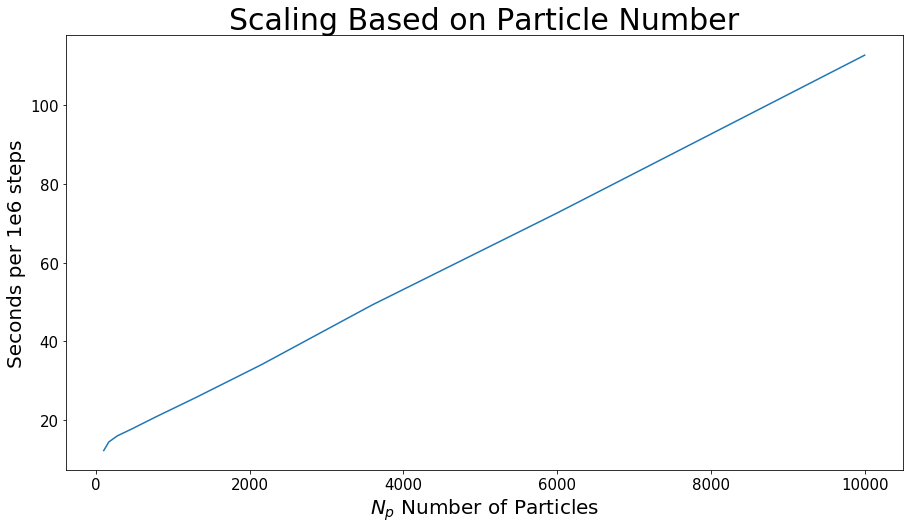

In [18]:
import matplotlib.pyplot as plt
default_size = 20 
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(num_part, times)
ax.set_xlabel(r"$N_p$ Number of Particles", size=default_size)
ax.set_ylabel("Seconds per 1e6 steps", size=default_size)
ax.set_title("Scaling Based on Particle Number", size=default_size + 10)
ax.tick_params(axis='both', which='major', labelsize=default_size - 5)